# Laboratorio 3.
El objetivo de este laboratorio es aprender la lectura/escritura de datos desde un archivo separado por comas (.csv) en Google Colab, calcular las medidas de tendencia central y de dispersión y practicar las visualizaciones de datos en Python.

## Actividad 1
### Conectar una unidad de Google Drive
Para realizar operaciones de lectura y escritura a disco en Google Colab, es necesario conectar una unidad del Drive en primer término. Las que siguen, son las instrucciones para hacerlo.

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


## Actividad 2
### Generar y almacenar los datos
La idea de esta actividad es aprender a generar números aleatorios de una distribución normal, que representan para el ejercicio la estatura de hombres y mujeres. Una vez creados los datos, almacenarlos en un archivo separado por comas.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm

s = ["F"]*20 + ["M"]*30 # Categorías de género
# Números aleatorios concatenados en una lista
e = list(np.round(norm.rvs(160, 2, size=20,
    random_state=1000))) + list(np.round(norm.rvs(170, 4, size=30,
                                                  random_state=1500)))
# Creación del df
df = pd.DataFrame(list(zip(s, e)), columns =['Sexo', 'Estatura'])
df
# Crear el archivo .csv 
df.to_csv('//content/drive/MyDrive/estatura.csv', index=False)

In [ ]:
df

,Sexo,Estatura
0,F,158.0
1,F,161.0
2,F,160.0
3,F,161.0
4,F,159.0
5,F,161.0
6,F,160.0
7,F,159.0
8,F,161.0
9,F,159.0


## Actividad 3
### Leer del disco
Ahora, recuperemos la información contenida en el archivo de disco

In [ ]:
df = pd.read_csv('//content/drive/MyDrive/estatura.csv')
df

,Sexo,Estatura
0,F,158.0
1,F,161.0
2,F,160.0
3,F,161.0
4,F,159.0
5,F,161.0
6,F,160.0
7,F,159.0
8,F,161.0
9,F,159.0


## Actividad 4
### Cálculo de medidas
Usando Pandas, podemos calcular las medidas más comunes.

In [ ]:
print("Media (General): ", df.Estatura.mean())
print("Media (F): ", df.Estatura[df.Sexo=="F"].mean())
print("Media (M): ", df.Estatura[df.Sexo=="M"].mean())
print("Desv. Est. (General): ", df.Estatura.std())
print("Desv. Est. (F): ", df.Estatura[df.Sexo=="F"].std())
print("Desv. Est. (M): ", df.Estatura[df.Sexo=="M"].std())
print("Mediana (General): ", df.Estatura.median())
print("Mediana (F): ", df.Estatura[df.Sexo=="F"].median())
print("Mediana (M): ", df.Estatura[df.Sexo=="M"].median())

print("Moda: ", df.mode())
print("Mediana: ", df.median())

print("Rango: [", min(df.Estatura), ", ", max(df.Estatura), ']')

print("Cuartiles:\n", df.Estatura.quantile([.25, .5, .75]))



Media (General):  166.08
Media (F):  159.85
Media (M):  170.23333333333332
Desv. Est. (General):  6.067107706178237
Desv. Est. (F):  1.348488432516786
Desv. Est. (M):  4.048697818186546
Mediana (General):  166.5
Mediana (F):  160.0
Mediana (M):  171.0
Moda:    Sexo  Estatura
0    M     171.0
Mediana:  Estatura    166.5
dtype: float64
Rango: [ 158.0 ,  177.0 ]
Cuartiles:
 0.25    160.0
0.50    166.5
0.75    171.0
Name: Estatura, dtype: float64


## Actividad 5
### Tabla de frecuencias
En este bloque se construye una función que elabora una tabla de frecuencias al estilo relatado en el material instruccional. Ingresa una serie o vector (**x**) con los valores de la variable a tabular, una bandera (**clases**) indicadora de si la función debe costruir intervalos de clase y el número de clases (**n_clases**) a construir en caso de que se desee un número distinto a las que propone la regla de Sturges.

In [ ]:
def tabla_frec(x, clases=True, n_clases=None):
  import math
  import pandas as pd

  xx = x[(x.isnull() == False)].copy() # Elimina los nulos de la tabla 
  n_total = len(xx) # Total de valores a tabular
  nn_clases = None # Inicializa el número de clases
  if clases:
    # Si deben construirse intervalos de clase
    if n_clases is None:
      # Aplíquese la regla de Sturges
      nn_clases = int(round(1+3.322*math.log10(n_total),0))
    else:
      # Tómese el número de clases indicado
      nn_clases = n_clases
    # Función clave del proceso que asigna intervalos de clase a cada
    # valor de xx
    xx, bins = pd.cut(xx, bins=nn_clases, right=False, retbins=True,
                      include_lowest=True, duplicates='drop')
    # Tabulación cruzada de los intervalos de clase y las frecuencias
    df_freq = pd.crosstab(index=xx, columns="f")
    # Agregando el resto de las frecuencias necesarias
    total = df_freq['f'].sum()
    df_freq['F'] = df_freq['f'].cumsum()
    df_freq['fr'] = round(df_freq['f']/total,5)
    df_freq['Fr'] = round(df_freq['F']/total,5)
    # Agregando la marca de clase
    mc = []
    for i in range(len(bins)-1):
      mc.append(round((bins[i]+bins[i+1])/2,2))
    df_freq['mc'] = mc
  else:
    # Si NO deben construirse intervalos de clase
    # Tabulación cruzada directa, en este caso.
    df_freq = pd.crosstab(index=xx, columns="f")
    total = df_freq['f'].sum()
    df_freq['F'] = df_freq['f'].cumsum()
    df_freq['fr'] = round(df_freq['f']/total,5)
    df_freq['Fr'] = round(df_freq['F']/total,5)
    # No son necesarias las marcas de clase

  # Devolvemos el número de clases formadas y la tabla de frecuencias
  return nn_clases, df_freq;

# Tabla de frecuencias para la variable Sexo
n_clases_sexo, tab_sexo = tabla_frec(df.Sexo, clases=False)
print(tab_sexo.to_latex()) # Escribir como una tabla LaTeX

# Tabla de frecuencias para la variable Estatura
n_clases_estat, tab_estat = tabla_frec(df.Estatura)
# Esta instrucción es importante si se desea que los nombres de las
# filas (en este caso, los intervalos de clase) pasen a ser una columna
# del df.
# tab.reset_index(inplace=True)
print(tab_estat.to_latex()) # Escribir como una tabla LaTeX


\begin{tabular}{lrrrr}
\toprule
col\_0 &   f &   F &   fr &   Fr \\
Sexo &     &     &      &      \\
\midrule
F    &  20 &  20 &  0.4 &  0.4 \\
M    &  30 &  50 &  0.6 &  1.0 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrrr}
\toprule
col\_0 &   f &   F &    fr &    Fr &      mc \\
Estatura           &     &     &       &       &         \\
\midrule
[158.0, 160.714)   &  14 &  14 &  0.28 &  0.28 &  159.36 \\
[160.714, 163.429) &   8 &  22 &  0.16 &  0.44 &  162.07 \\
[163.429, 166.143) &   3 &  25 &  0.06 &  0.50 &  164.79 \\
[166.143, 168.857) &   4 &  29 &  0.08 &  0.58 &  167.50 \\
[168.857, 171.571) &  10 &  39 &  0.20 &  0.78 &  170.21 \\
[171.571, 174.286) &   7 &  46 &  0.14 &  0.92 &  172.93 \\
[174.286, 177.019) &   4 &  50 &  0.08 &  1.00 &  175.65 \\
\bottomrule
\end{tabular}



## Actividad 6
### Calcular medidas a partir de los datos agrupados
... y comparar.

In [ ]:
print(df.Estatura.mean())
print(df.Estatura.var())
med_aprox = sum(tab_estat['f']*tab_estat['mc'])/50
var_aprox = sum(tab_estat['f']*(tab_estat['mc']-med_aprox)**2)/(50-1)
print(med_aprox)
print(var_aprox)

166.08
36.80979591836734
166.1436
33.45061534693877


## Actividad 7
### Gráfico de proporciones

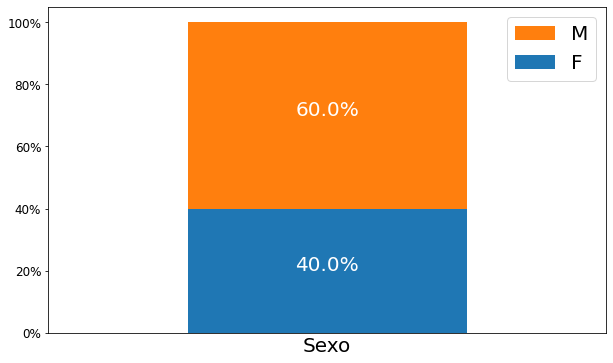

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Instrucción compleja. Examinar cuidadosamente...
df.assign(dummy = 1).groupby(
  ['dummy','Sexo']).size().groupby(level=0).apply(
      lambda x: 100 * x / x.sum()).to_frame().unstack().plot(
          kind='bar', stacked=True, legend=False,
          figsize=(10,6), fontsize=12)
# Escribir los porcentajes
plt.annotate(str(tab_sexo.fr[0]*100)+"%",
             xy=[0,(tab_sexo.fr[0]*100/2)],
             ha='center', color='white', fontsize=20)
plt.annotate(str(tab_sexo.fr[1]*100)+"%",
             xy=[0,(tab_sexo.fr[0]*100+tab_sexo.fr[1]*100/2)],
             ha='center', color='white', fontsize=20)
plt.xlabel("Sexo", fontsize=20)
plt.xticks([]) # Desahabilita las marcas para el eje x
# La leyenda (al revés para que coincida con la figura)
current_handles, _ = plt.gca().get_legend_handles_labels()
reversed_handles = reversed(current_handles)
correct_labels = reversed(df['Sexo'].unique())
plt.legend(reversed_handles, correct_labels, fontsize=20)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

## Actividad 8
### El histograma
Usando el número de clases de la tabla de frecuencias para la estatura.

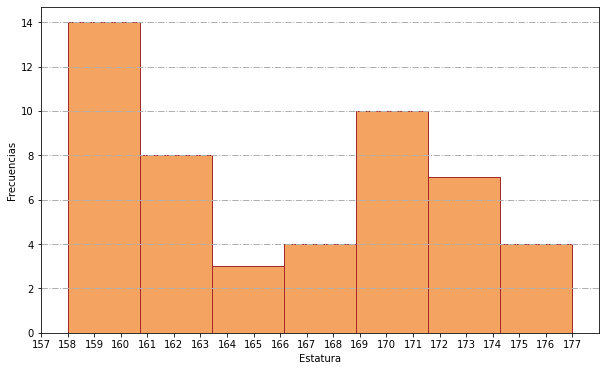

In [ ]:
plt.figure(figsize=(10,6))
# La figura
n, bins, patches = plt.hist(df['Estatura'], n_clases_estat,
                            facecolor='sandybrown',
                            edgecolor='brown')
plt.xlabel('Estatura')
plt.ylabel('Frecuencias')
plt.xlim([min(df.Estatura)-1, max(df.Estatura)+1])
plt.xticks(range(int(min(df.Estatura))-1, int(max(df.Estatura))+1))
plt.grid(axis='y', linestyle='dashdot', linewidth=1)
plt.show()

## Actividad 9
### La serie de tiempo Google
Usando un gráfico de lineas

            Date         Open         High  ...        Close    Adj Close    Volume
0     2010-01-04   312.304413   313.579620  ...   312.204773   312.204773   3927065
1     2010-01-05   312.418976   312.747742  ...   310.829926   310.829926   6031925
2     2010-01-06   311.761444   311.761444  ...   302.994293   302.994293   7987226
3     2010-01-07   303.562164   303.861053  ...   295.940735   295.940735  12876685
4     2010-01-08   294.894653   300.498657  ...   299.885956   299.885956   9484016
...          ...          ...          ...  ...          ...          ...       ...
2925  2021-08-17  2763.820068  2774.370117  ...  2746.010010  2746.010010   1063600
2926  2021-08-18  2742.310059  2765.879883  ...  2731.399902  2731.399902    746700
2927  2021-08-19  2709.350098  2749.040039  ...  2738.270020  2738.270020    914800
2928  2021-08-20  2741.659912  2772.290039  ...  2768.739990  2768.739990    778200
2929  2021-08-23  2779.969971  2843.539795  ...  2821.989990  2821.989990   

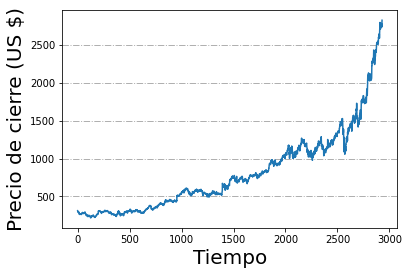

In [ ]:
import datetime as dt # Librería para el manejo de fechas
import matplotlib.pyplot as plt
from datetime import date
from pandas_datareader import data
   
start = dt.datetime(2010,1,1)
end = date.today()
# Lectura de .csv's de diversas fuentes. En este caso, Yahoo Finance
df_google = pd.read_csv('/content/GOOG.csv')
print(df_google)
# De ser necesario, transformar las fechas en un campo de la tabla
# y ordenar.
# df_google.index.name = 'Date'
# df_google.reset_index(inplace=True)
# df_google.sort_values(by=['Date'])

#plt.figure(figsize=(12,6))
# La figura
plt.plot(df_google['Close'])
plt.xlabel('Tiempo', fontsize=20)
plt.ylabel('Precio de cierre (US $)', fontsize=20)
plt.grid(axis='y', linestyle='dashdot', linewidth=1)
plt.show()



## Actividad 10
### Box-Plot
Usando la estatura como variable cuantitativa y el sexo como cualitativa, construir enuna misma figura ambos gráficos de caja.

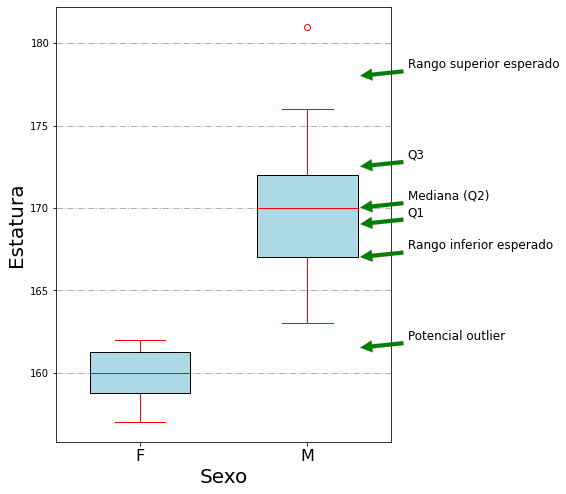

In [ ]:
plt.figure(figsize=(6, 8))
# La figura con opciones de colores...
bp = plt.boxplot(df.Estatura[(df.Sexo=='F')], positions=[1],
                 widths=0.6, patch_artist=True,
                 boxprops=dict(facecolor='lightblue'),
                 capprops=dict(color='red'),
                 whiskerprops=dict(color='red'),
                 flierprops=dict(color='red', markeredgecolor='red'),
                 medianprops=dict(color='red'))
# Se fabrican en realidad dos...
bp = plt.boxplot(df.Estatura[(df.Sexo=='M')], positions=[2],
                 widths=0.6, patch_artist=True,
                 boxprops=dict(facecolor='lightblue'),
                 capprops=dict(color='red'),
                 whiskerprops=dict(color='red'),
                 flierprops=dict(color='red', markeredgecolor='red'),
                 medianprops=dict(color='red'))
plt.xlabel('Sexo', fontsize=20)
plt.ylabel('Estatura', fontsize=20)
plt.xticks([1,2], labels=['F', 'M'], fontsize=16)
plt.grid(axis='y', linestyle='dashdot', linewidth=1)
# Las flechas en color verde y sus etiquetas
plt.annotate('Mediana (Q2)', xy=(2.3, 170), xytext=(2.6, 170.5), fontsize=12,
            arrowprops=dict(facecolor='green', shrink=0.05, linewidth=0.1))
plt.annotate('Q3', xy=(2.3, 172.5), xytext=(2.6, 173), fontsize=12,
            arrowprops=dict(facecolor='green', shrink=0.05, linewidth=0.1))
plt.annotate('Q1', xy=(2.3, 169), xytext=(2.6, 169.5), fontsize=12,
            arrowprops=dict(facecolor='green', shrink=0.05, linewidth=0.1))
plt.annotate('Rango superior esperado', xy=(2.3, 178), xytext=(2.6, 178.5),
             fontsize=12,
             arrowprops=dict(facecolor='green', shrink=0.05, linewidth=0.1))
plt.annotate('Rango inferior esperado', xy=(2.3, 167), xytext=(2.6, 167.5),
             fontsize=12,
             arrowprops=dict(facecolor='green', shrink=0.05, linewidth=0.1))
plt.annotate('Potencial outlier', xy=(2.3, 161.5), xytext=(2.6, 162),
             fontsize=12,
             arrowprops=dict(facecolor='green', shrink=0.05, linewidth=0.1))
plt.show()

## Actividad 11
### El gráfico de dispersión
... para una porción del valor de las acciones de Google, en la apertura y cierre.

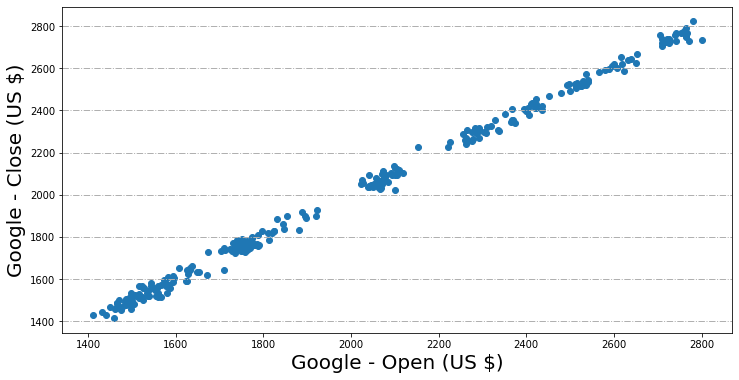

In [ ]:
plt.figure(figsize=(12,6))
# La figura sólo con algunos puntos finales de la serie.
plt.scatter(df_google.Open[2650:], df_google.Close[2650:])
plt.xlabel('Google - Open (US $)', fontsize=20)
plt.ylabel('Google - Close (US $)', fontsize=20)
plt.grid(axis='y', linestyle='dashdot', linewidth=1)
plt.show()

# Tarea 3
Usando los últimos dos años de la serie de valores de las acciones de Apple Inc. construir:
1. Un **df** con la información extraída de Yahoo Finance
2. Guardar el df en un archivo .csv en disco
3. De la variable 'Close' calcular las estadísticas
4. De la variable 'Close' hacer una tabla de frecuencias
5. De la variable 'Close' hacer un histograma
6. De las variables 'Open' y 'Close' desplegar simultáneamente las series temporales 

In [12]:
import datetime as dt 
import matplotlib.pyplot as plt
import pandas as pd
from datetime import date
from pandas_datareader import data

# Lectura de .csv's de diversas fuentes. En este caso, Yahoo Finance
df_apple = pd.read_csv('/content/drive/MyDrive/Datasets/AAPL.csv', index_col='Date', parse_dates=True)
df_apple.to_csv('//content/drive/MyDrive/Datasets/AAPL_corregido.csv', index=True)